# Solar Coordinates with SunPy

In this session we will use the AIA and STEREO image we downloaded in the last session do a quick demonstration of converting between different coordinates in SunPy. A different version of this example can be found in the [SunPy Gallery](http://docs.sunpy.org/en/stable/generated/gallery/tutorials/SDO_to_STEREO_Coordinate_Conversion.html).

## Reading the Data

If you have run the [VSO Notebook](./01-VSO-Instructors.ipynb) you should have the following two files:

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

import astropy.units as u
import sunpy.map

In [2]:
files = ['~/sunpy/data/20110101_000615_n4eub.2.fts',
         '~/sunpy/data/aia_lev1_304a_2011_01_01t00_00_08_12z_image_lev1.1.fits']

In [3]:
euvi, aia = sunpy.map.Map(files)

In [4]:
aia = aia.submap((-1100, 1100) * u.arcsec, (-1100, 1100) * u.arcsec)
euvi = euvi.submap((-1100, 1100) * u.arcsec, (-1100, 1100) * u.arcsec)

<IPython.core.display.Javascript object>


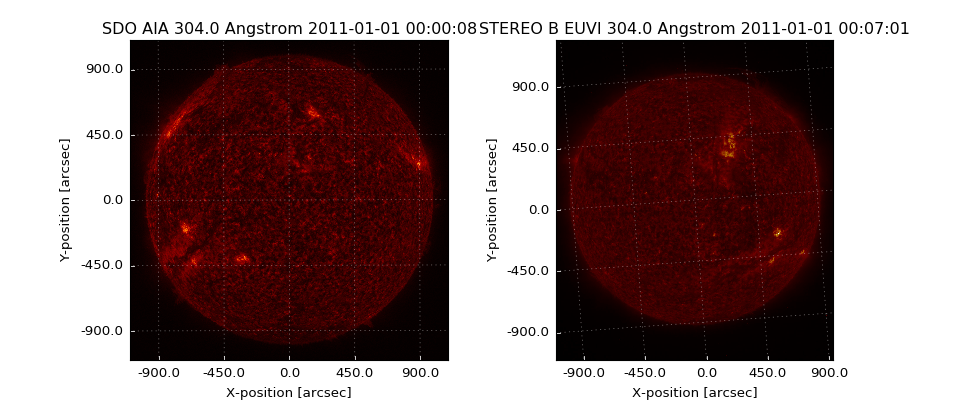

In [5]:
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 2, 1, projection=aia)
aia.plot(axes=ax1)
ax2 = fig.add_subplot(1, 2, 2, projection=euvi)
euvi.plot(axes=ax2)

## Helioprojective and Heliographic Coordinates

<div style="float:left; width:59%">
<h3>Helioprojective "Cartesian" Coordinates</h3>
<p>
The most common coordinate frame in solar physics is helioprojective cartesian, HPC, which is an observer centric spherical coordinate frame with the point of 0° longitude and 0° latitude aligned with the centre of the solar disk. Normally the radius (distance from the observer) is not known when imaging the sky.
</p>
<p>
These coordinates are commonly referred to as "Solar-x Solar-y", as they appear to be cartesian when dealing with small angles on the solar disk (see image on the right).
</p>
<h3> Heliocentric (Stonyhurst) Coordinates</h3>
<p>
Heliocentric coordinates, unlike helioprojective, have the origin at the centre of the Sun. The line of 0° longitude is aligned with the position of the Earth and the line of 0° latitude is around the solar equator. These coordinates are used to give positions on the Sun independant of the observer location.
</p>
</div>
<div style="float:left; width:39%">
<img src="coord_inset.png" width=100% />
</div>

SunPy can convert between these two coordinate systems:

In [6]:
import sunpy.coordinates
from astropy.coordinates import SkyCoord

In [7]:
coord1 = SkyCoord(100*u.arcsec, 500*u.arcsec, frame=aia.coordinate_frame)
coord1

<SkyCoord (Helioprojective: D0=147100673949.48 m, dateobs=2011-01-01 00:00:08.120000, L0=0.0 deg, B0=-2.974563 deg, rsun=695508.0 km): (Tx, Ty) in arcsec
    (100.0, 500.0)>

In [8]:
coord1.transform_to("heliographic_stonyhurst")

<SkyCoord (HeliographicStonyhurst: dateobs=2011-01-01 00:00:08.120000): (lon, lat, radius) in (deg, deg, km)
    (6.62659201, 27.75132758, 695508.00000101)>

You can also plot points in both systems (coordinates should be specified in degrees to matplotlib):

<IPython.core.display.Javascript object>


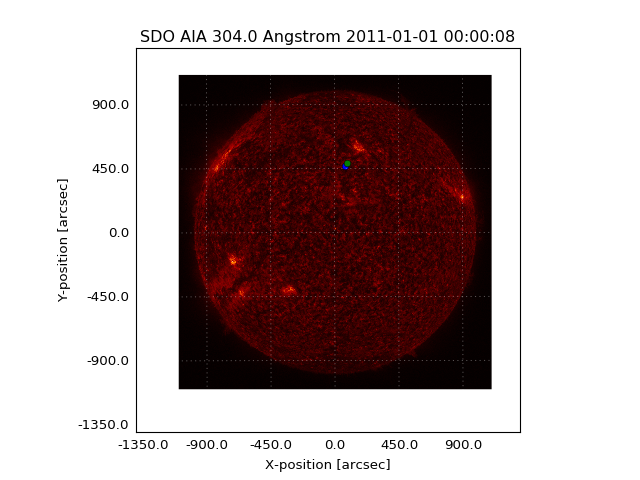

In [9]:
fig = plt.figure()
ax = plt.subplot(projection=aia)
aia.plot(axes=ax)
ax.plot(0.02, 0.13, 'bo', transform=ax.get_transform('helioprojective'))
ax.plot(6, 27, 'go', transform=ax.get_transform('heliographic_stonyhurst'))

## Converting from SDO to STEREO

In this example we are going to take a point in an AIA image, convert it to heliographic coordinates then calculate that point in helioprojective coordinates from the point of view of STEREO.

*Note: This will be much easier in SunPy 0.8*

In [10]:
aia_hpc = SkyCoord(-711*u.arcsec, -217*u.arcsec, frame=aia.coordinate_frame)
aia_hpc

<SkyCoord (Helioprojective: D0=147100673949.48 m, dateobs=2011-01-01 00:00:08.120000, L0=0.0 deg, B0=-2.974563 deg, rsun=695508.0 km): (Tx, Ty) in arcsec
    (-711.0, -217.0)>

In [11]:
hgs = aia_hpc.transform_to('heliographic_stonyhurst')
hgs

<SkyCoord (HeliographicStonyhurst: dateobs=2011-01-01 00:00:08.120000): (lon, lat, radius) in (deg, deg, km)
    (-48.73906497, -14.78894084, 695507.99999676)>

In [12]:
euvi_hpc = hgs.transform_to(euvi.coordinate_frame)
euvi_hpc

<SkyCoord (Helioprojective: D0=158345292023.0 m, dateobs=2011-01-01 00:07:01.811000, L0=-89.5809837657 deg, B0=6.76626852815 deg, rsun=695508.0 km): (Tx, Ty, distance) in (arcsec, arcsec, km)
    (574.62058645, -308.67103874, 157861808.60020253)>

<IPython.core.display.Javascript object>


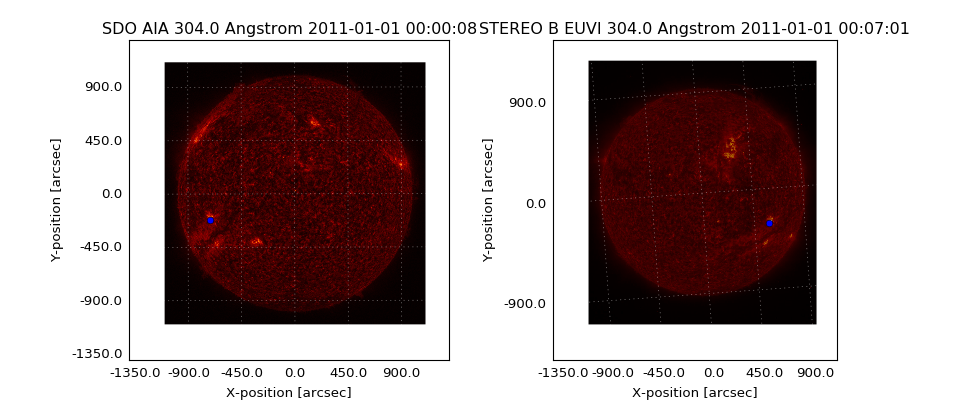

In [13]:
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 2, 1, projection=aia)
aia.plot(axes=ax1)
ax1.plot(aia_hpc.Tx.to(u.deg), aia_hpc.Ty.to(u.deg), 'o', transform=ax1.get_transform('helioprojective'))
ax2 = fig.add_subplot(1, 2, 2, projection=euvi)
euvi.plot(axes=ax2)
ax2.plot(euvi_hpc.Tx.to(u.deg), euvi_hpc.Ty.to(u.deg), 'o', transform=ax2.get_transform('helioprojective'))